# Case 3. Новый дизайн сайта

### Описание проекта
Отдел маркетинга разработал новый дизайн посадочной страницы клиента (lending). Пользователи сайта оценили новый дизайн. Результаты итоговой оценки зафиксированы в количественной переменной Общая оценка. Средняя оценка старого дизайна по результатам прошлого исследования составляет 30 баллов.

Значимо ли улучшился дизайн посадочной страницы сайта, и есть ли влияние возраста на оценку нового дизайна?
Необходимо ответить на вопрос, используя статистические методы, а также дать рекомендации отделу маркетинга по результатам проведенного анализа.

### Методология исследования

* Для проверки значимости улучшения дизайна страницы сайта и влияния возраста на оценку нового дизайна можно использовать методы статистического анализа, такие как t-тест и ANOVA (дисперсионный анализ).

Например, для проверки значимости улучшения дизайна можно провести одновыборочный t-тест, сравнивая среднюю оценку нового дизайна с известной средней оценкой старого дизайна (30 баллов).

* Для проверки влияния возраста на оценку нового дизайна можно провести ANOVA, сравнивая среднюю оценку нового дизайна в различных возрастных группах.

По результатам анализа можно дать рекомендации отделу маркетинга о том, насколько значимым является улучшение дизайна страницы сайта, и какие возрастные группы наиболее положительно оценили новый дизайн.

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt

In [3]:
d = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\case_studies_da\\3. Lending\\data_lending.xlsx")
d.head(10)

,Возрастная группа,Общая оценка
0,65 и страше,38.454803
1,55-64,17.669677
2,65 и страше,31.704307
3,65 и страше,25.924460
4,До 25,30.450007
5,До 25,35.609909
6,65 и страше,29.677695
7,25-34,38.167369
8,65 и страше,23.509700
9,45-54,26.051029


In [25]:
d.columns = ['age_group', 'estimation']
d

,age_group,estimation
0,65 и старше,38.454803
1,55-64,17.669677
2,65 и старше,31.704307
3,65 и старше,25.924460
4,До 25,30.450007
...,...,...
63,45-54,46.567682
64,65 и старше,23.999491
65,До 25,24.994419
66,65 и старше,33.538502


In [26]:
d['age_group'].unique()

array(['65 и старше', '55-64', 'До 25', '25-34', '45-54', '35-44'],
      dtype=object)

In [27]:
d['age_group'] = d['age_group'].replace('65 и страше', '65 и старше')
d

,age_group,estimation
0,65 и старше,38.454803
1,55-64,17.669677
2,65 и старше,31.704307
3,65 и старше,25.924460
4,До 25,30.450007
...,...,...
63,45-54,46.567682
64,65 и старше,23.999491
65,До 25,24.994419
66,65 и старше,33.538502


In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_group   68 non-null     object 
 1   estimation  68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [68]:
len(d)

68

In [29]:
d_groupped = d.groupby(['age_group', 'estimation']).agg('mean')
d_groupped.head(50)

Empty DataFrame
Columns: []
Index: [(25-34, 22.76450651063485), (25-34, 25.58500668944609), (25-34, 26.630205496556208), (25-34, 27.972810167969072), (25-34, 30.670047359158023), (25-34, 32.14124856096765), (25-34, 36.89735046357534), (25-34, 37.26891763078062), (25-34, 38.167369316922894), (25-34, 38.68263722683812), (35-44, 21.82348818729791), (35-44, 26.231598126388246), (35-44, 28.382726771943087), (35-44, 33.34599145679954), (35-44, 34.9035529714881), (35-44, 40.28679395622565), (35-44, 41.06334645920889), (35-44, 41.33701490912717), (35-44, 41.77364271953462), (35-44, 44.47616661374673), (35-44, 44.639185744861095), (35-44, 45.95319081965232), (45-54, 26.051029338859273), (45-54, 33.427605521441926), (45-54, 34.92067539045753), (45-54, 37.20182906279645), (45-54, 40.83179200293301), (45-54, 40.97364374757257), (45-54, 41.20805475725068), (45-54, 42.499905834048356), (45-54, 46.567681825615466), (45-54, 47.50146983758766), (55-64, 17.66967736054725), (55-64, 29.14516301054452), (55-64, 29.294096750946238), (55-64, 30.82292329783081), (55-64, 31.143939257298232), (55-64, 32.608214475353726), (65 и старше, 15.73447341312344), (65 и старше, 23.509699820257058), (65 и старше, 23.999491126338732), (65 и старше, 24.484315849716257), (65 и старше, 24.910108008587024), (65 и старше, 25.17548185159543), (65 и старше, 25.924459918855018), (65 и старше, 26.728349213211995), (65 и старше, 27.563324702888835), (65 и старше, 27.837497982970895), (65 и старше, 29.677695486531245), (65 и старше, 30.36090027897812)]

In [35]:
grouped_data = d.groupby('age_group')['estimation'].mean().reset_index()

"""
The reset_index() method will convert the grouped data from a Series to a DataFrame
with the age group categories in a new "age_group" column and
the mean estimations in a "estimation" column.
"""
type(grouped_data)

pandas.core.frame.DataFrame

In [54]:
grouped_data

,age_group,estimation
0,25-34,31.678010
1,35-44,37.018058
2,45-54,39.118369
3,55-64,28.447336
4,65 и старше,28.002791
5,До 25,28.749228


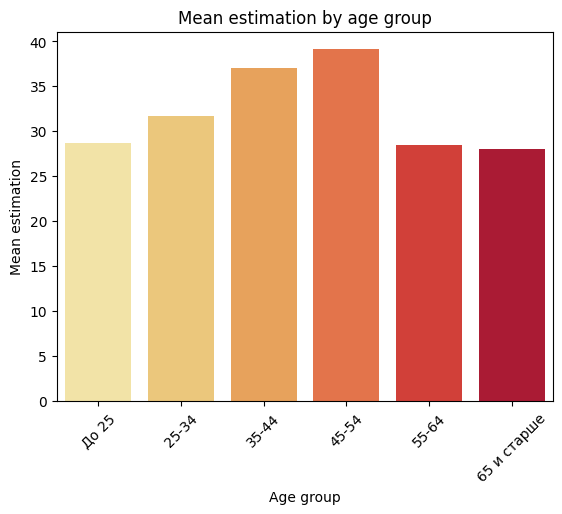

In [57]:
# Define the order of age groups for the plot
age_order = ['До 25', '25-34', '35-44', '45-54', '55-64', '65 и старше']

# Create the barplot
ax = sns.barplot(x='age_group', y='estimation', data=grouped_data, order=age_order, palette='YlOrRd')

# Set the title and labels for the plot
ax.set_title('Mean estimation by age group')
ax.set(xlabel='Age group', ylabel='Mean estimation')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Show the plot
plt.show();

```
'Blues'
'Greens'
'Reds'
'BuPu'
'OrRd'
'YlGnBu'
'YlOrRd'
```

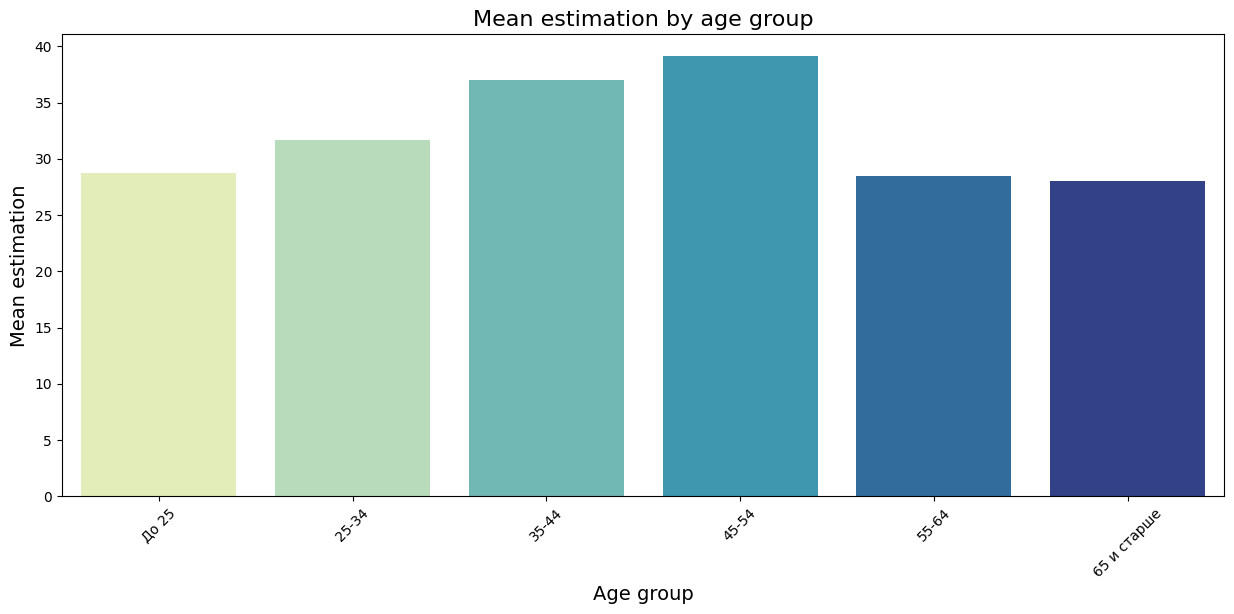

In [45]:
# Create the barplot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='age_group', y='estimation', data=grouped_data, order=age_order, palette='YlGnBu')

# Set the title and labels for the plot
ax.set_title('Mean estimation by age group', fontsize=16)
ax.set_xlabel('Age group', fontsize=14)
ax.set_ylabel('Mean estimation', fontsize=14)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Show the plot
plt.show();

In [47]:
d['age_group'].unique()

array(['65 и старше', '55-64', 'До 25', '25-34', '45-54', '35-44'],
      dtype=object)

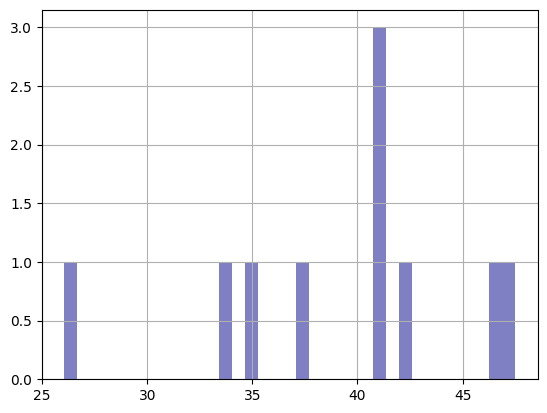

In [67]:
d[d['age_group'] =='45-54']['estimation'].hist(bins=35, alpha=0.5, color='darkblue');

## Проверка гипотез

### Гипотеза 1 - Средняя оценка разных возрастных групп пользователей разная.
```H_0: Средняя оценка разных возрастных групп одинакова.```
```H_a: Средняя оценка разных возрастных групп отличается.```

```alpha = 0.05```

In [85]:
alpha = .05 # significance level

# group_less_25 = d[d['age_group'] == 'До 25']
# group_25_34 = d[d['age_group'] == '25-34']
# group_35_44 = d[d['age_group'] == '35-44']
group_45_54 = d[d['age_group'] == '45-54']
group_55_64 = d[d['age_group'] == '55-64']
# group_older_65 = d[d['age_group'] == '65 и старше']

# testing hypothesis with st.ttest_ind()
results = st.ttest_ind(
    # group_less_25['estimation'],
    # group_25_34['estimation'],
    # group_35_44['estimation'],
    group_45_54['estimation'],
    group_55_64['estimation'],
    # group_older_65['estimation'],
    equal_var = False)

print(results.pvalue) # printing p-value

if results.pvalue < alpha:
    # comparing received p-value with a significance level alpha
    print("Нулевая гипотеза не поддерживается.")
else:
    print("Нулевая гипотеза поддерживается.")

0.003947426406539865
Нулевая гипотеза не поддерживается.


### *Вывод:*
* Отличия в оценках возрастной группы "До 25" и "45_54" статистически значими при уровне значимости alpha = 0.05.
* Отличия в оценках возрастной группы "До 25" и "35-44" статистически значими при уровне значимости alpha = 0.05.
* Отличия в оценках возрастной группы "45-54" и "55-64" статистически значими при уровне значимости alpha = 0.05.

### Гипотеза 2 - Средняя оценка разных группы "45-54" больше.
```H_0: Средняя оценка разных группы "45-54" = средней оценке остальных возрастных групп.```
```H_a: Средняя оценка разных группы "45-54" != средней оценке остальных возрастных групп.```

```alpha = 0.05```

In [86]:
alpha = .05 # significance level

group_45_54 = d[d['age_group'] == '45-54']
not_group_45_54 = d[d['age_group'] != '45-54']


# testing hypothesis with st.ttest_ind()
results = st.ttest_ind(
    group_45_54['estimation'],
    not_group_45_54['estimation'],
    # group_older_65['estimation'],
    equal_var = False)

print(results.pvalue) # printing p-value

if results.pvalue < alpha:
    # comparing received p-value with a significance level alpha
    print("Нулевая гипотеза не поддерживается.")
else:
    print("Нулевая гипотеза поддерживается.")

0.0023616711043377855
Нулевая гипотеза не поддерживается.


### *Вывод:* Нулевая гипотеза не поддерживается, значит, поддерживается альтернативная. То есть **средняя оценка разных группы "45-54" не равно средней оценке остальных возрастных групп.** Этот вывод является статистически значимым на уровне значимости alpha= 0.05.

### Гипотеза 3 - Средняя оценка разных группы после обновления сайта изменилась и статистически значима.

Средняя оценка старого дизайна по результатам прошлого исследования составляет 30 баллов.

```H_0: Средняя оценка разных группы после обновления составляет 30 баллов.```
```H_a: Средняя оценка разных группы после обновления отлична от 30 баллов.```

In [63]:
old_landing = 30
new_landing = d['estimation'].mean()

print(f"Old landing estimation = {old_landing}. New landing estimation = {new_landing}.")

Old landing estimation = 30. New landing estimation = 31.95076354936375.


#### Дисперсионный анализ: повлияли ли изменения в дизайне лендинга на среднюю оценку?

In [89]:
# Задаем данные
old_estimation = 30
new_estimation = np.array([31.678010, 37.018058, 39.118369, 28.447336, 28.002791, 28.749228])

# Выполняем однофакторный дисперсионный анализ
f_value, p_value = f_oneway(new_estimation, np.full_like(new_estimation, old_estimation))

# Выводим результаты
print(f"F-value: {f_value:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the means.")


F-value: 1.23
P-value: 0.2938
Fail to reject null hypothesis, there is no significant difference between the means.


### *Вывод:* Да, измененения лендинга повлияли на оценку, и эти изменения являются статически знаничимыми на уровне alpha = 0.05.